In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
fee= pd.read_excel("C:/Users/trinity/Downloads/Doctor_fee_consultation/Final Participant Data Folder/Final_Train.xlsx")
fee.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [3]:
fee_test=pd.read_excel("C:/Users/trinity/Downloads/Doctor_fee_consultation/Final Participant Data Folder/Final_Test.xlsx")
fee_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [4]:
fee.shape

(5961, 7)

In [5]:
fee.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

<AxesSubplot:>

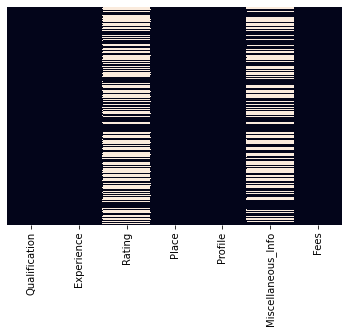

In [6]:
sns.heatmap(fee.isnull(), yticklabels=False,cbar=False)

# Handling missing values

In [7]:
# we have replaced NaN values with 0
fee['Rating'].fillna('0%',inplace=True)
fee.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,0%,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,0%,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [8]:
#filling all the non_null values with 1 and null values with 0
for i in fee['Miscellaneous_Info'].value_counts().index:
    fee['Miscellaneous_Info'].replace(i,int(1),inplace=True)
fee['Miscellaneous_Info'].fillna(int(0),inplace=True)

In [9]:
# We will fill the NaN values withe None
fee['Place'].fillna('None,None',inplace=True)


In [10]:
fee.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64

# Data Preprocessing

###### Qualification

In [11]:
# Max qualification and min qualification of doctors in dataset
Max=fee.Qualification.apply(lambda x: len(x.split(',')))
print("Maximum qualifications of a doctor in the Train dataset is {}\n".format(Max.max()))
print("And the qualifications is --> {}\n\n".format(fee.Qualification[Max.idxmax()]))
print('\n')
print("Minimum qualifications of a doctor in the Train dataset is {}\n".format(Max.min()))

print("And the qualifications is --> {}\n\n".format(fee.Qualification[Max.idxmin()]))


Maximum qualifications of a doctor in the Train dataset is 10

And the qualifications is --> Fellowship in Oral implantlogy, Certified Advance Course In Endodontics, Certified in Orthodontics, Certification in Full Mouth Rehabilitation, Certified BPS Dentist, Certificate in Cosmetic Dentistry, Professional Implantology Training Course (PITC), Fellowship in Advanced Endoscopic Sinus Surgery, Degree in Dental Implant, Fellowship in Lasers & Cosmetology




Minimum qualifications of a doctor in the Train dataset is 1

And the qualifications is --> BAMS




In [12]:
fee['Qualification'].value_counts()[:30]

BDS                                                      488
BHMS                                                     477
BAMS                                                     471
MBBS                                                     334
MBBS, MS - ENT                                           220
MBBS, MD - Dermatology                                   178
MBBS, MD - General Medicine                              177
MBBS, MD - Dermatology , Venereology & Leprosy           140
BHMS, MD - Homeopathy                                     93
MBBS, DDVL                                                92
MBBS, Diploma in Otorhinolaryngology (DLO)                84
BAMS, MD - Ayurveda Medicine                              82
BDS, MDS - Conservative Dentistry & Endodontics           68
MBBS, DDV                                                 66
BDS, MDS                                                  63
BDS, MDS - Oral & Maxillofacial Surgery                   57
MD - Dermatology , Vener

In [13]:
#To to give 1 if feature is present else 0
def features(arr,string):
    for data in dat:
        if data.find(string)!=-1:
            arr.append(int(1))
        else:
            arr.append(int(0))

# To enter the values into a dataframe
def to_df(lst):
    lst=pd.DataFrame(lst)
    return(lst)

In [14]:
#To create a dataframe with all qualification
col=['BDS','BHMS','BAMS','MBBS','MS','MD','DDVL','DLO','MDS','DDV']

In [15]:
dat=fee["Qualification"]
BDS=[]
BHMS=[]
BAMS=[]
MBBS=[]
MS=[]
MD=[]
DDVL=[]
DLO=[]
MDS=[]
DDV=[]

features(BDS,'BDS')
features(BHMS,'BHMS')
features(BAMS,'BAMS')
features(MBBS,'MBBS')
features(MS,'MS')
features(DDVL,'DDVL')
features(DLO,'DLO')
features(MDS,'MDS')
features(DDV,'DDV')
features(MD,'MD')

BDS=to_df(BDS)
BHMS=to_df(BHMS)
BAMS=to_df(BAMS)
MBBS=to_df(MBBS)
MS=to_df(MS)
DDVL=to_df(DDVL)
DLO=to_df(DLO)
MDS=to_df(MDS)
DDV=to_df(DDV)
MD=to_df(MD)



In [16]:
fee= fee.drop('Qualification',axis=1)
fee=pd.concat([BDS,BHMS,BAMS,MBBS,MS,MD,DDVL,DLO,MDS,DDV,fee],axis=1)

In [17]:
mx=fee.columns[10:]
for i in mx:
    col.append(i)
fee.columns=col
fee.head()

,BDS,BHMS,BAMS,MBBS,MS,MD,DDVL,DLO,MDS,DDV,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,0,1,0,0,1,1,0,0,0,0,24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,1.0,100
1,0,0,1,0,1,1,0,0,0,0,12 years experience,98%,"Whitefield, Bangalore",Ayurveda,1.0,350
2,0,0,0,1,1,0,0,0,0,0,9 years experience,0%,"Mathikere - BEL, Bangalore",ENT Specialist,0.0,300
3,0,0,1,0,1,0,0,0,0,0,12 years experience,0%,"Bannerghatta Road, Bangalore",Ayurveda,1.0,250
4,0,0,1,0,1,0,0,0,0,0,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,1.0,250


###### Experience

In [18]:
# we will remove the text part and keep only numeric part
for i in fee["Experience"].value_counts().index:
    x=i.split()
    fee["Experience"].replace(i,int(x[0]),inplace=True)
    

In [19]:
fee.head()

,BDS,BHMS,BAMS,MBBS,MS,MD,DDVL,DLO,MDS,DDV,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,0,1,0,0,1,1,0,0,0,0,24,100%,"Kakkanad, Ernakulam",Homeopath,1.0,100
1,0,0,1,0,1,1,0,0,0,0,12,98%,"Whitefield, Bangalore",Ayurveda,1.0,350
2,0,0,0,1,1,0,0,0,0,0,9,0%,"Mathikere - BEL, Bangalore",ENT Specialist,0.0,300
3,0,0,1,0,1,0,0,0,0,0,12,0%,"Bannerghatta Road, Bangalore",Ayurveda,1.0,250
4,0,0,1,0,1,0,0,0,0,0,20,100%,"Keelkattalai, Chennai",Ayurveda,1.0,250


###### Place

In [20]:
fee["Area"]=fee["Place"].str.rsplit(',',1).str.get(0)
fee["City"]=fee["Place"].str.rsplit(',',1).str.get(1)

In [21]:
fee=fee.drop('Place',axis=1)

In [22]:
fee.head()

,BDS,BHMS,BAMS,MBBS,MS,MD,DDVL,DLO,MDS,DDV,Experience,Rating,Profile,Miscellaneous_Info,Fees,Area,City
0,0,1,0,0,1,1,0,0,0,0,24,100%,Homeopath,1.0,100,Kakkanad,Ernakulam
1,0,0,1,0,1,1,0,0,0,0,12,98%,Ayurveda,1.0,350,Whitefield,Bangalore
2,0,0,0,1,1,0,0,0,0,0,9,0%,ENT Specialist,0.0,300,Mathikere - BEL,Bangalore
3,0,0,1,0,1,0,0,0,0,0,12,0%,Ayurveda,1.0,250,Bannerghatta Road,Bangalore
4,0,0,1,0,1,0,0,0,0,0,20,100%,Ayurveda,1.0,250,Keelkattalai,Chennai


Text(0, 0.5, 'Fee')

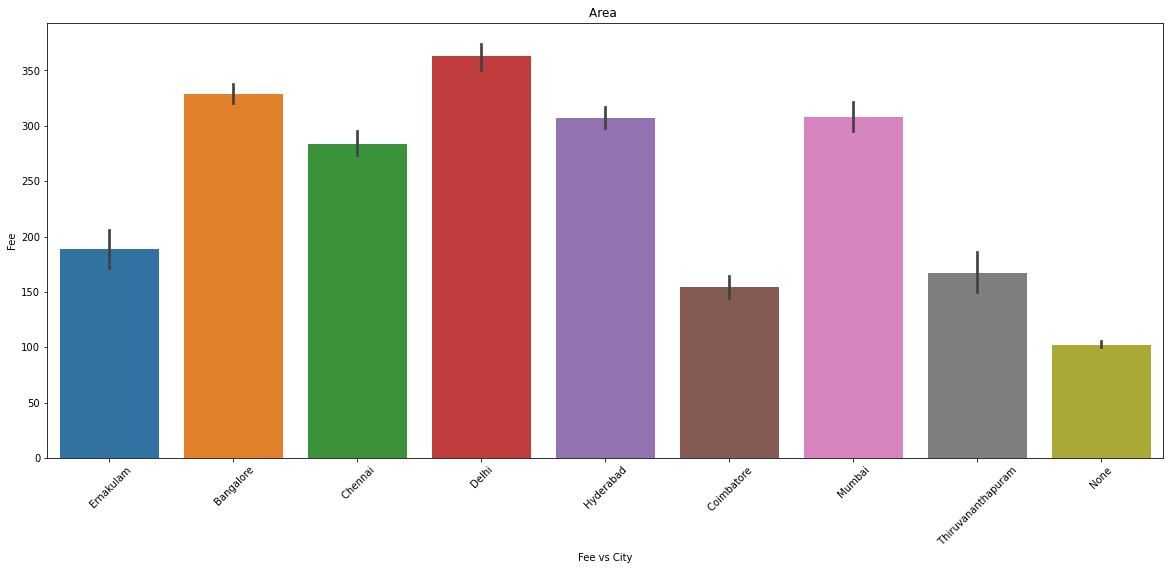

In [23]:
plt.figure(figsize=(20,8))
sns.barplot(x="City",y="Fees",data=fee)
plt.title("Area ")
plt.xlabel("Fee vs City")
plt.xticks(rotation=45)
plt.ylabel("Fee")

# Encoding

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

fee["Rating"]=le.fit_transform(fee["Rating"])
fee["Profile"]=le.fit_transform(fee["Profile"])
fee["Area"]=le.fit_transform(fee["Area"])
fee["City"]=le.fit_transform(fee["City"].astype(str))
fee.head()

,BDS,BHMS,BAMS,MBBS,MS,MD,DDVL,DLO,MDS,DDV,Experience,Rating,Profile,Miscellaneous_Info,Fees,Area,City
0,0,1,0,0,1,1,0,0,0,0,24,1,5,1.0,100,297,4
1,0,0,1,0,1,1,0,0,0,0,12,50,0,1.0,350,857,0
2,0,0,0,1,1,0,0,0,0,0,9,0,3,0.0,300,453,0
3,0,0,1,0,1,0,0,0,0,0,12,0,0,1.0,250,68,0
4,0,0,1,0,1,0,0,0,0,0,20,1,0,1.0,250,336,1


In [25]:
# Created a datafram making all qualification one column
col1=['BDS','BHMS','BAMS','MBBS','MS','MD','DDVL','DLO','MDS','DDV']
summ=np.zeros(len(fee))
for i in col1:
    arr=fee[i]
    summ=np.add(summ,arr)
temp_df=pd.DataFrame({'qual':summ,'fees':fee['Fees']}) 


# Correlation with target variable

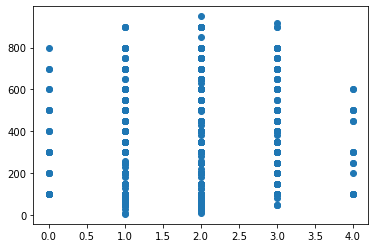

In [26]:
plt.scatter(temp_df['qual'],temp_df['fees'])

<AxesSubplot:xlabel='qual', ylabel='fees'>

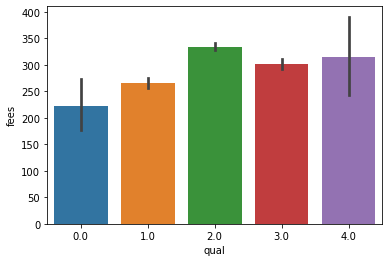

In [27]:
sns.barplot(x=temp_df['qual'],y=temp_df['fees'],data=temp_df.sort_values("fees"))

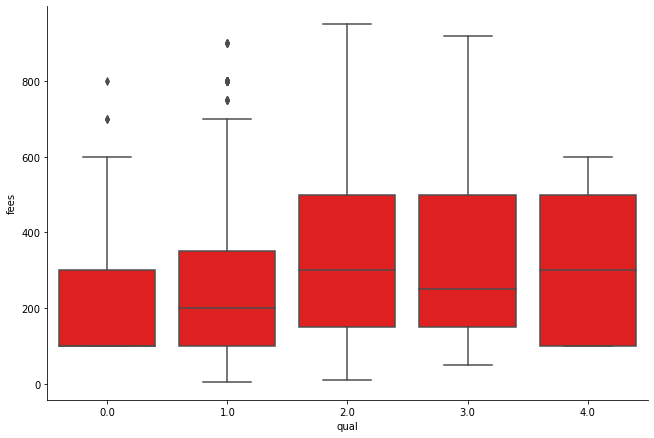

In [28]:
sns.catplot(x='qual',y='fees', data=temp_df.sort_values("fees"),kind='box',height=6,aspect= 1.5,color='r')
plt.show()

In [29]:
fee=pd.concat([temp_df,fee],axis=1)
fee.head()

,qual,fees,BDS,BHMS,BAMS,MBBS,MS,MD,DDVL,DLO,MDS,DDV,Experience,Rating,Profile,Miscellaneous_Info,Fees,Area,City
0,3.0,100,0,1,0,0,1,1,0,0,0,0,24,1,5,1.0,100,297,4
1,3.0,350,0,0,1,0,1,1,0,0,0,0,12,50,0,1.0,350,857,0
2,2.0,300,0,0,0,1,1,0,0,0,0,0,9,0,3,0.0,300,453,0
3,2.0,250,0,0,1,0,1,0,0,0,0,0,12,0,0,1.0,250,68,0
4,2.0,250,0,0,1,0,1,0,0,0,0,0,20,1,0,1.0,250,336,1


In [30]:
fee=fee.drop(['fees','BDS','BHMS','BAMS','MBBS','MS','MD','DDVL','DLO','MDS','DDV'],axis=1)
fee

,qual,Experience,Rating,Profile,Miscellaneous_Info,Fees,Area,City
0,3.0,24,1,5,1.0,100,297,4
1,3.0,12,50,0,1.0,350,857,0
2,2.0,9,0,3,0.0,300,453,0
3,2.0,12,0,0,1.0,250,68,0
4,2.0,20,1,0,1.0,250,336,1
...,...,...,...,...,...,...,...,...
5956,2.0,19,50,3,1.0,300,70,0
5957,1.0,33,0,4,0.0,100,537,1
5958,1.0,41,49,4,1.0,600,216,3
5959,2.0,15,42,4,1.0,100,842,6


In [31]:
corr=fee.corr()
corr

,qual,Experience,Rating,Profile,Miscellaneous_Info,Fees,Area,City
qual,1.000000,-0.093062,0.133633,-0.166486,0.135814,0.079947,-0.007229,-0.041649
Experience,-0.093062,1.000000,0.033027,0.202073,-0.120359,0.002117,0.008512,0.017650
Rating,0.133633,0.033027,1.000000,-0.102447,0.581560,0.143121,-0.035260,-0.094580
Profile,-0.166486,0.202073,-0.102447,1.000000,-0.170498,0.145226,0.018157,-0.015087
Miscellaneous_Info,0.135814,-0.120359,0.581560,-0.170498,1.000000,0.168466,-0.037264,-0.095592
Fees,0.079947,0.002117,0.143121,0.145226,0.168466,1.000000,-0.058247,-0.035914
Area,-0.007229,0.008512,-0.035260,0.018157,-0.037264,-0.058247,1.000000,-0.084822
City,-0.041649,0.017650,-0.094580,-0.015087,-0.095592,-0.035914,-0.084822,1.000000


<AxesSubplot:>

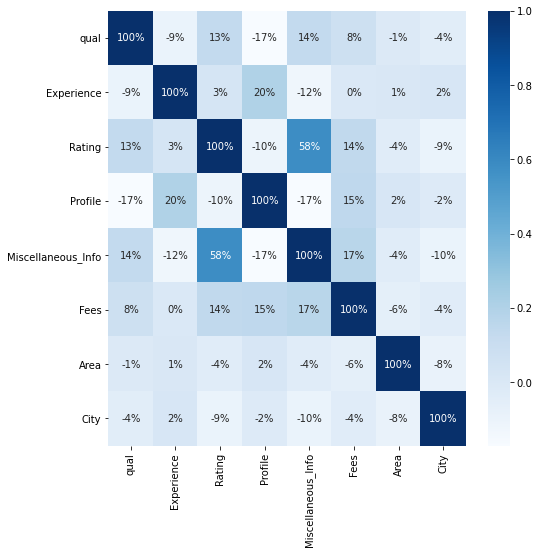

In [32]:
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True,fmt=".0%",cmap="Blues")

Text(0.5, 1.0, 'Correlation with Target variable')

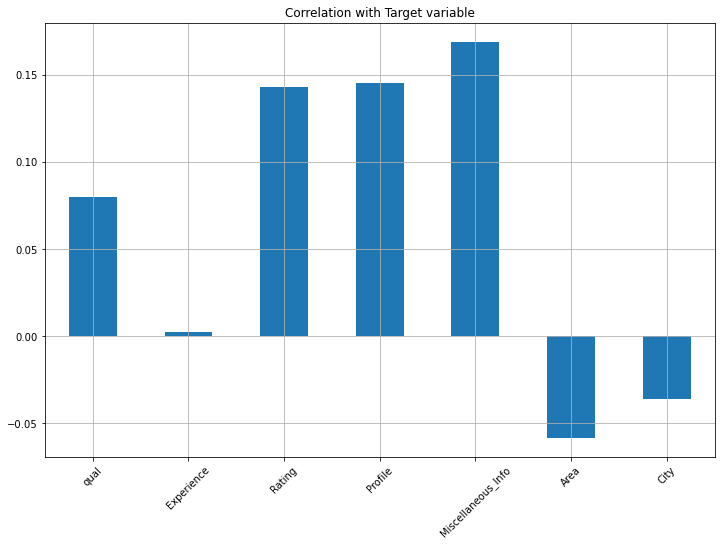

In [33]:
plt.figure(figsize=(12,8))
fee.drop("Fees",axis=1).corrwith(fee["Fees"]).plot(kind="bar",grid=True)
plt.xticks(rotation=45)
plt.title("Correlation with Target variable")

# Test data

In [34]:
fee_test=pd.read_excel("C:/Users/trinity/Downloads/Doctor_fee_consultation/Final Participant Data Folder/Final_Test.xlsx")
fee_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [35]:
fee_test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [36]:
fee_test['Qualification']

0                                                  MBBS
1            MBBS, Diploma in Otorhinolaryngology (DLO)
2                                            MBBS, DDVL
3                                                  BAMS
4       BDS, MDS - Conservative Dentistry & Endodontics
                             ...                       
1982                           BAMS, Doctor of Medicine
1983     MD - Dermatology , Venereology & Leprosy, MBBS
1984           MBBS, MD / MS - Obstetrics & Gynaecology
1985                                                BDS
1986     MBBS, MD - Dermatology , Venereology & Leprosy
Name: Qualification, Length: 1987, dtype: object

In [37]:
fee_test['Rating'].fillna('0%',inplace=True)

for i in fee_test['Miscellaneous_Info'].value_counts().index:
    fee_test['Miscellaneous_Info'].replace(i,int(1),inplace=True)
fee_test['Miscellaneous_Info'].fillna(int(0),inplace=True)

fee_test['Place'].fillna('None,None',inplace=True)

def features(arr,string):
    for data in d:
        if data.find(string)!=-1:
            arr.append(int(1))
        else:
            arr.append(int(0))

# To enter the values into a dataframe
def to_df(lst):
    lst=pd.DataFrame(lst)
    return(lst)

col=['BDS','BHMS','BAMS','MBBS','MS','MD','DDVL','DLO','MDS','DDV']
d=fee_test['Qualification']
BDS=[]
BHMS=[]
BAMS=[]
MBBS=[]
MS=[]
MD=[]
DDVL=[]
DLO=[]
MDS=[]
DDV=[]

d=fee_test['Qualification']
features(BDS,'BDS')
features(BHMS,'BHMS')
features(BAMS,'BAMS')
features(MBBS,'MBBS')
features(MS,'MS')
features(DDVL,'DDVL')
features(DLO,'DLO')
features(MDS,'MDS')
features(DDV,'DDV')
features(MD,'MD')

BDS=to_df(BDS)
BHMS=to_df(BHMS)
BAMS=to_df(BAMS)
MBBS=to_df(MBBS)
MS=to_df(MS)
DDVL=to_df(DDVL)
DLO=to_df(DLO)
MDS=to_df(MDS)
DDV=to_df(DDV)
MD=to_df(MD)



fee_test= fee_test.drop('Qualification',axis=1)
fee_test=pd.concat([BDS,BHMS,BAMS,MBBS,MS,MD,DDVL,DLO,MDS,DDV,fee_test],axis=1)
mx=fee_test.columns[10:]
for i in mx:
    col.append(i)
fee_test.columns=col



for i in fee_test["Experience"].value_counts().index:
    x=i.split()
    fee_test["Experience"].replace(i,int(x[0]),inplace=True)
    
fee_test["Area"]=fee_test["Place"].str.rsplit(',',1).str.get(0)
fee_test["City"]=fee_test["Place"].str.rsplit(',',1).str.get(1)
fee_test.drop('Place',axis=1)


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

fee_test["Rating"]=le.fit_transform(fee_test["Rating"])
fee_test["Profile"]=le.fit_transform(fee_test["Profile"])
fee_test["Area"]=le.fit_transform(fee_test["Area"])
fee_test["City"]=le.fit_transform(fee_test["City"].astype(str))
fee_test.head()

col1=['BDS','BHMS','BAMS','MBBS','MS','MD','DDVL','DLO','MDS','DDV']
summ=np.zeros(len(fee_test))
for i in col1:
    arr=fee_test[i]
    summ=np.add(summ,arr)
temp_df=pd.DataFrame({'qual':summ}) 

fee_test=pd.concat([temp_df,fee_test],axis=1)


fee_test=fee_test.drop(['BDS','BHMS','BAMS','MBBS','MS','MD','DDVL','DLO','MDS','DDV','Place'],axis=1)
fee_test.head()


    

,qual,Experience,Rating,Profile,Miscellaneous_Info,Area,City
0,1.0,35,0,4,0.0,142,6
1,2.0,31,0,3,0.0,578,5
2,3.0,40,10,2,1.0,212,1
3,2.0,0,0,0,0.0,373,3
4,3.0,16,1,1,1.0,231,0


# Modeling

In [38]:
X=fee.drop('Fees',axis=1)
y=fee["Fees"]

In [39]:
## scaling input variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)

In [40]:
# splitting data in train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state = 42)


In [41]:
#importing all modeling libraries
from sklearn.linear_model import LogisticRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#import boosting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#import error matrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [42]:
# all algorithim using loop
model=[LogisticRegression(),Lasso(),Ridge(),ElasticNet(),DecisionTreeRegressor(),SVR(),KNeighborsRegressor(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
for m in model:
    m.fit(X_train,y_train)
    score=m.score(X_train,y_train)
    predm=m.predict(X_test)
    print("score of ",m,'is:',score)
    print("MAE:",mean_absolute_error(y_test,predm))
    print("MSE:",mean_squared_error(y_test,predm))
    print("RMSE:",np.sqrt(mean_squared_error(y_test,predm)))
    print("R2_score:",r2_score(y_test,predm))
    print("************************************************")
    print('\n')
          

score of  LogisticRegression() is: 0.256501677852349
MAE: 174.63537300922044
MSE: 58128.58340318525
RMSE: 241.09870054229916
R2_score: -0.6874998133645229
************************************************


score of  Lasso() is: 0.071993959574431
MAE: 145.9236880521222
MSE: 31969.283482644947
RMSE: 178.79956231111123
R2_score: 0.07191683072385513
************************************************


score of  Ridge() is: 0.07217134907030254
MAE: 145.67246833580663
MSE: 31936.322941036156
RMSE: 178.70736677886606
R2_score: 0.07287369057759419
************************************************


score of  ElasticNet() is: 0.06342145628934392
MAE: 147.24178891315458
MSE: 32232.93306780612
RMSE: 179.53532540368238
R2_score: 0.06426296063610182
************************************************


score of  DecisionTreeRegressor() is: 0.9962452437330678
MAE: 157.3428331936295
MSE: 49972.63369656329
RMSE: 223.54559645979003
R2_score: -0.4507287998293674
***********************************************

In [43]:
model=[LogisticRegression(),Lasso(),Ridge(),ElasticNet(),DecisionTreeRegressor(),SVR(),KNeighborsRegressor(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

for m in model:
    score=cross_val_score(m,X,y,cv=10,scoring='r2')
    print('model:',m)
    print('score:',score)
    print('Mean score',score.mean())
    print('standarad deviation',score.std())
    print("*********************************************")
    print('\n')

model: LogisticRegression()
score: [-0.67827299 -0.73357809 -0.46270064 -0.57696548 -0.69787019 -0.64720118
 -0.57794378 -0.72444832 -0.64904856 -0.56505996]
Mean score -0.631308919460443
standarad deviation 0.08059524759570585
*********************************************


model: Lasso()
score: [0.04586079 0.06515588 0.0946396  0.08158474 0.05767182 0.08337963
 0.06207431 0.04649448 0.08343061 0.06008654]
Mean score 0.06803783940661423
standarad deviation 0.01591843222454549
*********************************************


model: Ridge()
score: [0.04472379 0.06628675 0.09658233 0.08184947 0.05719624 0.08458385
 0.0613019  0.04481175 0.08483904 0.05984095]
Mean score 0.06820160712083932
standarad deviation 0.01696318494729222
*********************************************


model: ElasticNet()
score: [0.04826072 0.06380701 0.07730206 0.06883178 0.04863151 0.07135293
 0.05577144 0.04730456 0.06831518 0.05584264]
Mean score 0.060541983481085714
standarad deviation 0.010248612804888804
***

RandomForestRegressor has best score and r2  score.I choose it as final model

In [44]:
#using GridsearchCV to find parameters 
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[400,500,600,700],'max_depth':[4,5,6,15,20]}
RFC=RandomForestRegressor()

clf=GridSearchCV(RFC,parameters) 
clf.fit(X,y)
print(clf.best_params_)


{'max_depth': 6, 'n_estimators': 600}


In [45]:
# using RandomForestRegressor with its best parameters
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=400,min_samples_split=15,min_samples_leaf=1,max_features='auto',max_depth=20)
rf.fit(X_train,y_train)
print('score:',rf.score(X_train,y_train))
y_pred=rf.predict(X_test)
print('\n')
print('mean absolute error', mean_absolute_error(y_test,y_pred))
print('mean squared error', mean_squared_error(y_test,y_pred))
print('Root mean squared error', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('r2 score',r2_score(y_test,y_pred))

score: 0.5771809789650517


mean absolute error 124.02875404886241
mean squared error 26000.857836262632
Root mean squared error 161.24781498135914


r2 score 0.2451830033138842


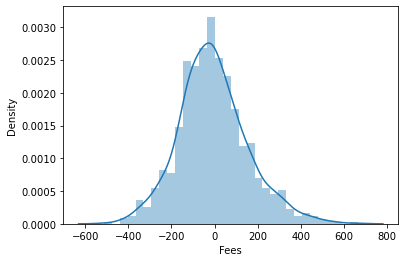

In [46]:
#plotting distribution plot we find Gaussian plot
sns.distplot(y_test-y_pred)
plt.show()

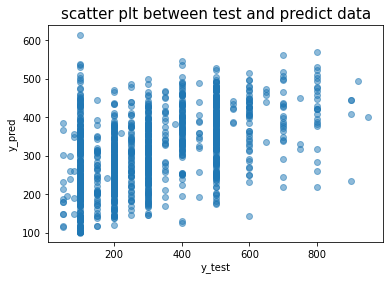

In [47]:
#scatter plot between test data and predicted data
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('scatter plt between test and predict data',fontsize=15)
plt.show()

In [48]:
#saving the model
import joblib
joblib.dump(rf,'doctors consultation fee prediction_rf.pk1')

['doctors consultation fee prediction_rf.pk1']

###### Now we are going to predict the test data with the model we've build.

In [49]:
X_test=fee_test
y_prediction=clf.predict(X_test)


In [50]:
for i in range(len(y_prediction)):
    print(y_prediction[i])
    break

309.79696362689174


In [51]:
y_fin=[]
for i in range(len(y_prediction)):
    y_fin.append(y_prediction[i])
y_fin=pd.DataFrame({'id':np.arange(1,len(y_fin)+1,1),'Fees':y_fin})
print(y_fin.head())

   id        Fees
0   1  309.796964
1   2  309.796964
2   3  316.323001
3   4  347.471920
4   5  279.340212
